In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [38]:
df=pd.read_csv("CC GENERAL.csv")

In [39]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [41]:
df.shape

(8950, 18)

In [42]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8945    False
8946    False
8947    False
8948    False
8949    False
Length: 8950, dtype: bool

In [43]:
df.duplicated().sum()

np.int64(0)

In [44]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [45]:
df.fillna({'CREDIT_LIMIT':df['CREDIT_LIMIT'].median(),'MINIMUM_PAYMENTS': df['MINIMUM_PAYMENTS'].median()}, inplace=True)

In [46]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

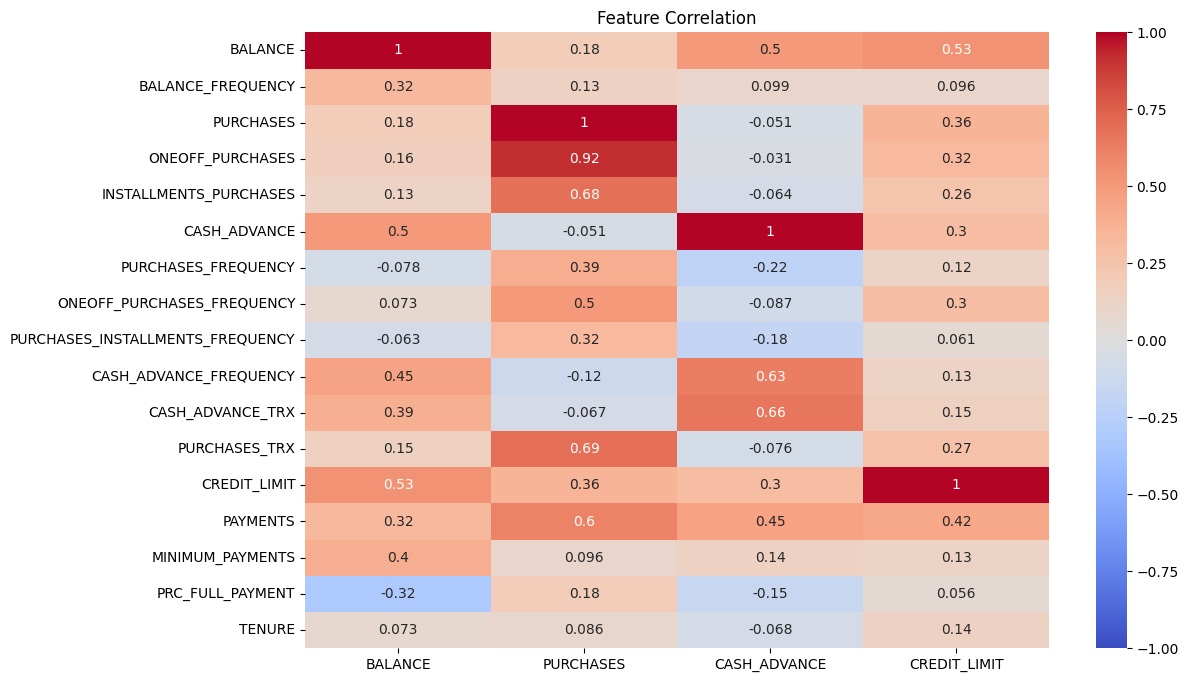

In [47]:
#Correlation-driven feature selection
corr = df.corr(numeric_only= True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr[['BALANCE','PURCHASES','CASH_ADVANCE','CREDIT_LIMIT']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation')
plt.show()


In [48]:
# select feature
selected_feature=[
    'BALANCE',
    'PURCHASES',
    'CREDIT_LIMIT',
    'PAYMENTS'
]
df['PAYMENT_UTTLIZATION']=df['BALANCE']/ df['CREDIT_LIMIT']
selected_feature.append('PAYMENT_UTTLIZATION')

In [49]:
print(selected_feature)

['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS', 'PAYMENT_UTTLIZATION']


In [50]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[selected_feature])

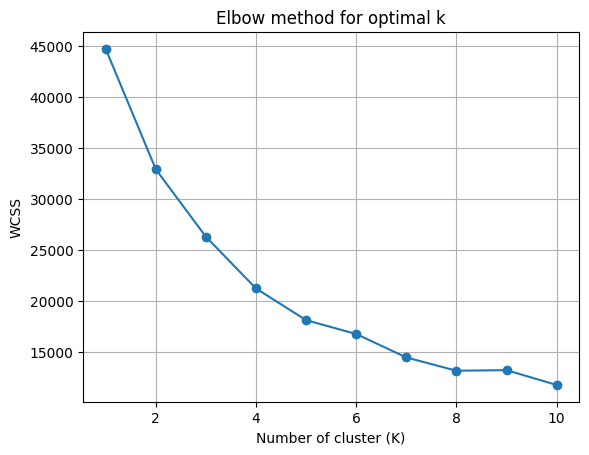

In [55]:
#find optimal number of cluster using elbow method
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11),wcss, marker='o')
plt.xlabel('Number of cluster (K)')
plt.ylabel("WCSS")
plt.title('Elbow method for optimal k')
plt.grid()
plt.show()

In [52]:
#now apply optimal k=4 in kmeans
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [58]:
cluster_summary = df.groupby('Cluster')[selected_feature].mean()
print(cluster_summary)

             BALANCE     PURCHASES  CREDIT_LIMIT      PAYMENTS  \
Cluster                                                          
0        5077.659870   1473.597268   9508.723462   3291.954821   
1         414.515068    879.233249   4112.631705   1225.517006   
2        1720.369687    438.011385   2240.096346   1024.913092   
3        4252.552507  10687.722697  11974.671053  16468.333979   

         PAYMENT_UTTLIZATION  
Cluster                       
0                   0.578086  
1                   0.110483  
2                   0.797655  
3                   0.349568  


In [59]:
print(cluster_summary.round(2))

         BALANCE  PURCHASES  CREDIT_LIMIT  PAYMENTS  PAYMENT_UTTLIZATION
Cluster                                                                 
0        5077.66    1473.60       9508.72   3291.95                 0.58
1         414.52     879.23       4112.63   1225.52                 0.11
2        1720.37     438.01       2240.10   1024.91                 0.80
3        4252.55   10687.72      11974.67  16468.33                 0.35


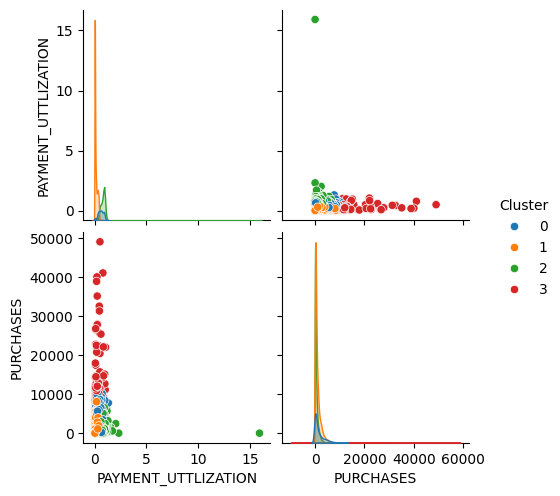

In [62]:
im_feature = ['PAYMENT_UTTLIZATION','PURCHASES']
sns.pairplot(df[im_feature + ['Cluster']], hue='Cluster',palette='tab10')
plt.show()